In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**FEATURE** **ENGINEERING**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset_full.csv")

In [ ]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,...,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,...,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,...,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


In [ ]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [ ]:
len(df.columns)

112

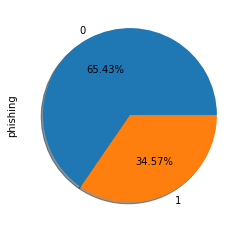

In [ ]:
df['phishing'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

In [ ]:
x=df.drop('phishing',axis=1)
y=df['phishing']

**FEATURE** **SELECTION**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)

In [ ]:
#FIND THE CONSTANT OR LOWER FEATURES
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0.0)
vt.fit(x_train)

VarianceThreshold(threshold=0.0)

In [ ]:
x_train

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
373,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,23,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.564777,0,32244,5244,233,1,5,1,3599,0,-1,0,0,0
21736,3,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,24,0,0,...,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.236443,0,13335,3233,53,2,2,1,298,1,0,0,0,0
61598,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,21,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.661679,-1,14061,5553,290,1,2,1,3591,1,1,0,0,0
31430,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,12,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1.045057,-1,63410,6233,340,1,2,1,14388,1,1,0,0,0
53468,3,6,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,154,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,22,0,0,...,0,0,0,0,86,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,2.274339,-1,18229,513,216,1,2,1,4671,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.576284,0,53831,8396,2195,1,2,5,898,0,1,0,0,0
45891,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,35,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,35,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.296028,0,16509,3598,53,1,2,5,3598,1,1,0,0,0
42613,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,32,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,22,0,0,...,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.854455,0,20013,3228,58,1,2,1,12311,1,0,0,0,0
43567,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,...,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.168295,0,3595,-1,-1,1,2,1,11614,0,1,0,0,0


In [ ]:
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
cl=[col for col in x_train.columns
    if col not in x_train.columns[vt.get_support()]]

In [ ]:
len(x.columns[vt.get_support()])

97

In [ ]:
len(cl)

14

In [ ]:
cl

['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

In [ ]:
x_train.drop(cl,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x_test.drop(cl,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
len(x_train.columns)

97

In [ ]:
len(x_test.columns)

97

In [ ]:
#USING CORRLATION TO FIND THE FEATURES
x_train.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,...,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
qty_dot_url,1.000000,0.129274,0.143645,0.240048,0.348372,0.478261,0.106592,0.517870,0.018521,0.014584,0.017462,0.037486,0.014575,0.000214,0.014339,0.007518,0.047786,0.400471,0.439529,0.504064,0.057692,-0.000602,0.149202,0.281691,0.061047,0.017617,0.417150,0.129663,0.156053,0.210031,0.155991,0.155809,0.122185,0.145385,0.154335,0.155613,0.154583,0.156142,0.155073,0.137812,...,0.147453,0.155991,0.155991,0.052771,0.095367,0.682688,0.225438,0.242025,0.275369,0.423324,0.469715,0.396416,0.545933,0.350870,0.355275,0.355837,0.351797,0.340947,0.355203,0.355132,0.356205,0.153146,0.379679,0.412988,0.399548,0.323654,-0.003341,-0.018188,0.011194,-0.087798,-0.076446,-0.058375,-0.015031,-0.057206,0.008792,-0.067269,-0.053193,-0.001227,-0.001343,-0.058930
qty_hyphen_url,0.129274,1.000000,0.223869,0.302078,0.058652,0.185381,0.031779,0.134974,0.016840,0.018563,0.011371,0.023308,0.007826,0.011134,0.057032,0.022197,0.028728,0.152453,0.418401,-0.008045,0.392738,-0.007077,0.105999,0.132437,-0.005698,0.017858,0.233373,0.724912,0.227193,0.291538,0.233321,0.236408,0.185830,0.209164,0.232837,0.233176,0.228607,0.233063,0.230902,0.207435,...,0.221910,0.233321,0.233321,0.087227,0.243220,0.123612,0.507404,0.238947,0.162398,0.179113,0.191070,0.168642,0.165413,0.176876,0.183390,0.183508,0.181498,0.175707,0.183438,0.182305,0.187563,0.082139,0.253721,0.182075,0.207009,0.075003,-0.016679,-0.001747,0.006448,-0.112273,-0.023339,0.030246,0.031785,-0.035422,-0.033403,0.001088,0.003147,-0.003342,-0.000519,-0.013852
qty_underline_url,0.143645,0.223869,1.000000,0.244618,0.034737,0.344728,0.033841,0.267801,0.044796,-0.001577,0.058180,0.032517,0.021350,0.021040,-0.001031,0.037901,0.079244,0.150758,0.431255,-0.031750,0.036913,0.048142,0.015713,0.001351,0.007620,0.006081,0.221746,0.143936,0.476257,0.221952,0.178314,0.181008,0.143239,0.165748,0.180738,0.178141,0.183843,0.177991,0.179019,0.167174,...,0.172684,0.178314,0.178314,0.093610,0.195145,0.179358,0.372076,0.768868,0.242983,0.283811,0.360813,0.275708,0.321886,0.311830,0.313917,0.315494,0.312034,0.301228,0.314551,0.314395,0.322316,0.158692,0.388356,0.287792,0.392168,0.089369,-0.001274,0.009792,0.015465,-0.084237,-0.034764,0.009381,0.020213,-0.018516,-0.025991,0.012855,-0.023545,-0.001389,0.004785,-0.013127
qty_slash_url,0.240048,0.302078,0.244618,1.000000,0.165001,0.284874,0.072722,0.194022,0.020088,0.019374,0.070211,0.078746,0.027698,0.009855,0.005458,0.016177,0.048456,0.258496,0.589560,-0.200244,0.045015,-0.011707,0.066719,-0.027306,0.046762,-0.010195,0.702714,0.572084,0.662449,0.955627,0.720978,0.725609,0.574659,0.651466,0.717105,0.720935,0.715505,0.720693,0.716670,0.646418,...,0

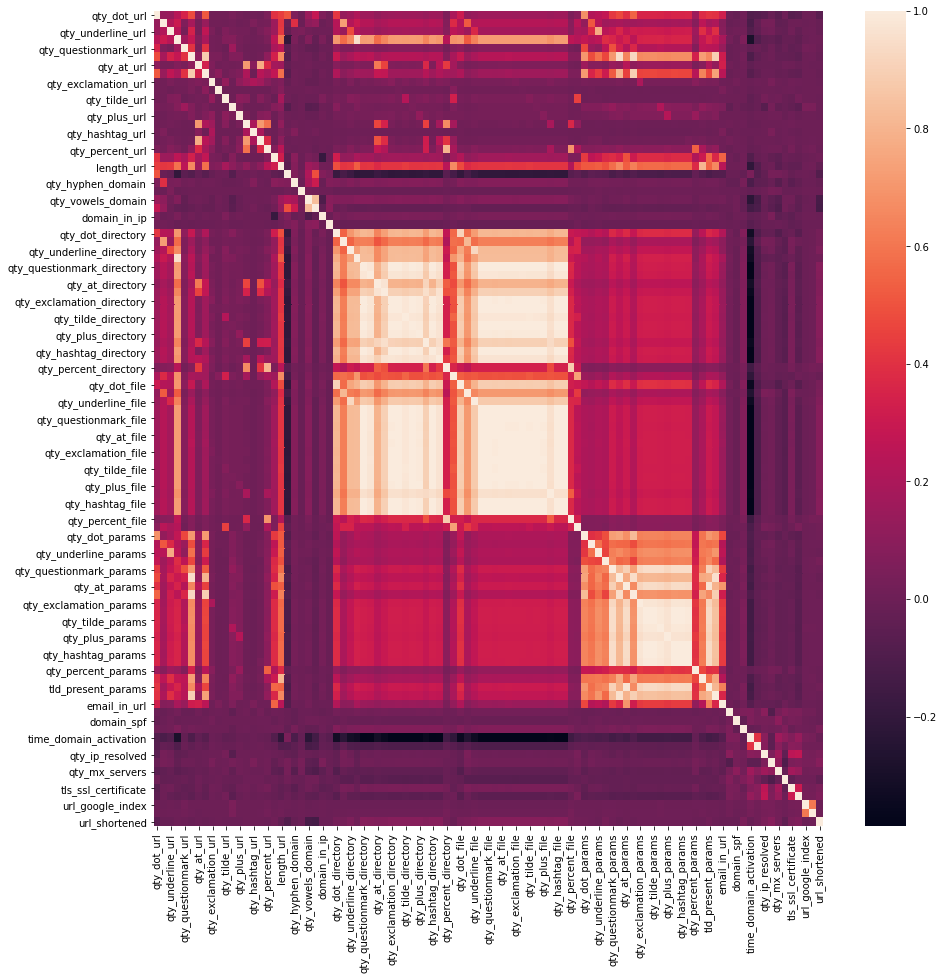

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train.corr())

In [ ]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr=correlation(x_train,0.7)
len(corr)

56

In [ ]:
corr

{'domain_length',
 'file_length',
 'params_length',
 'qty_and_directory',
 'qty_and_file',
 'qty_and_params',
 'qty_and_url',
 'qty_asterisk_directory',
 'qty_asterisk_file',
 'qty_asterisk_params',
 'qty_asterisk_url',
 'qty_at_directory',
 'qty_at_file',
 'qty_at_params',
 'qty_comma_directory',
 'qty_comma_file',
 'qty_comma_params',
 'qty_dollar_directory',
 'qty_dollar_file',
 'qty_dollar_params',
 'qty_dollar_url',
 'qty_dot_directory',
 'qty_dot_file',
 'qty_dot_params',
 'qty_equal_directory',
 'qty_equal_file',
 'qty_equal_params',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_exclamation_params',
 'qty_hashtag_directory',
 'qty_hashtag_file',
 'qty_hashtag_params',
 'qty_hyphen_directory',
 'qty_hyphen_file',
 'qty_params',
 'qty_percent_directory',
 'qty_percent_file',
 'qty_plus_directory',
 'qty_plus_file',
 'qty_plus_params',
 'qty_questionmark_directory',
 'qty_questionmark_file',
 'qty_questionmark_params',
 'qty_slash_directory',
 'qty_slash_file',
 'qty

In [ ]:
x_train=x_train.drop(corr,axis=1)
x_test=x_test.drop(corr,axis=1)

In [ ]:
x_train

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_hashtag_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_vowels_domain,domain_in_ip,server_client_domain,directory_length,qty_hyphen_params,qty_slash_params,qty_percent_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
373,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,2,0,0,7,0,0,-1,-1,-1,-1,0,0.564777,0,32244,5244,233,1,5,1,3599,0,-1,0,0,0
21736,3,1,0,3,0,0,0,0,0,0,0,0,0,0,1,50,3,0,0,8,0,0,26,-1,-1,-1,0,0.236443,0,13335,3233,53,2,2,1,298,1,0,0,0,0
61598,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21,1,0,0,9,0,0,-1,-1,-1,-1,0,0.661679,-1,14061,5553,290,1,2,1,3591,1,1,0,0,0
31430,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12,1,0,0,3,0,0,-1,-1,-1,-1,0,1.045057,-1,63410,6233,340,1,2,1,14388,1,1,0,0,0
53468,3,6,1,6,0,0,0,0,0,0,0,0,0,0,1,154,1,0,0,8,0,0,132,-1,-1,-1,0,2.274339,-1,18229,513,216,1,2,1,4671,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,5,0,0,-1,-1,-1,-1,0,0.576284,0,53831,8396,2195,1,2,5,898,0,1,0,0,0
45891,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,35,2,0,0,12,0,0,-1,-1,-1,-1,0,0.296028,0,16509,3598,53,1,2,5,3598,1,1,0,0,0
42613,2,0,0,2,0,0,0,0,0,0,0,0,0,0,1,32,2,0,0,7,0,0,10,-1,-1,-1,0,0.854455,0,20013,3228,58,1,2,1,12311,1,0,0,0,0
43567,2,0,0,2,0,0,0,0,0,0,0,0,0,0,1,24,2,0,0,4,0,0,7,-1,-1,-1,0,0.168295,0,3595,-1,-1,1,2,1,11614,0,1,0,0,0


In [ ]:
#USING INFORMATION GAIN
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info



array([4.87348557e-02, 5.69855205e-02, 3.82691316e-02, 3.75385160e-01,
       1.51646434e-03, 6.43962031e-02, 2.35281693e-02, 0.00000000e+00,
       1.09872962e-04, 7.37740068e-03, 1.12778801e-03, 5.53730982e-03,
       1.97118644e-03, 8.79683868e-03, 3.18902525e-02, 2.86517041e-01,
       6.76394070e-02, 5.47076279e-03, 1.44937247e-03, 1.12953249e-02,
       2.13180530e-03, 0.00000000e+00, 3.85688386e-01, 6.93756306e-02,
       6.74432972e-02, 7.00433649e-02, 1.81676220e-02, 7.61416549e-04,
       1.71635563e-02, 1.55250894e-01, 2.04696358e-01, 4.91392956e-02,
       1.23559928e-02, 1.11260339e-02, 1.33099906e-02, 9.58150715e-02,
       1.92293136e-03, 1.28223208e-02, 0.00000000e+00, 0.00000000e+00,
       3.02767621e-03])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

directory_length          0.385688
qty_slash_url             0.375385
length_url                0.286517
time_domain_activation    0.204696
asn_ip                    0.155251
ttl_hostname              0.095815
qty_percent_params        0.070043
qty_hyphen_params         0.069376
qty_dot_domain            0.067639
qty_slash_params          0.067443
qty_equal_url             0.064396
qty_hyphen_url            0.056986
time_domain_expiration    0.049139
qty_dot_url               0.048735
qty_underline_url         0.038269
qty_tld_url               0.031890
qty_at_url                0.023528
email_in_url              0.018168
domain_spf                0.017164
qty_mx_servers            0.013310
qty_redirects             0.012822
qty_ip_resolved           0.012356
qty_vowels_domain         0.011295
qty_nameservers           0.011126
qty_percent_url           0.008797
qty_tilde_url             0.007377
qty_plus_url              0.005537
qty_hyphen_domain         0.005471
url_shortened       

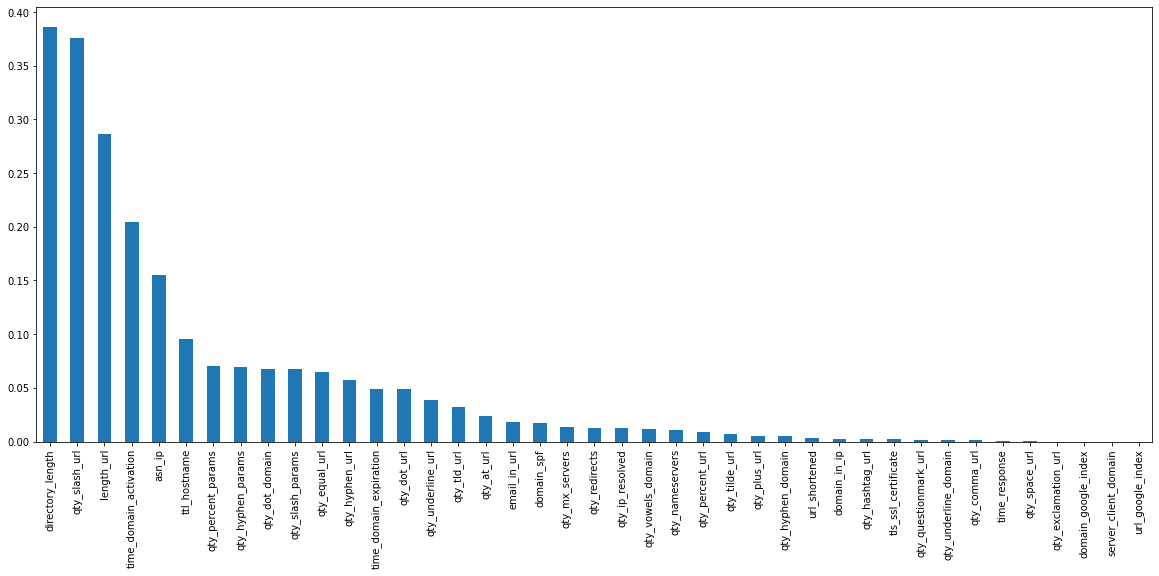

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#IMPORTANT FEATURES
sel_12_cols = SelectKBest(mutual_info_classif, k=10)
sel_12_cols.fit(x_train, y_train)
x_train.columns[sel_12_cols.get_support()]

Index(['qty_slash_url', 'qty_equal_url', 'length_url', 'qty_dot_domain',
       'directory_length', 'qty_hyphen_params', 'qty_percent_params', 'asn_ip',
       'time_domain_activation', 'ttl_hostname'],
      dtype='object')

In [ ]:
final_col=[col for col in x_train.columns
    if col not in x_train.columns[sel_12_cols.get_support()]]

In [ ]:
final_col

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_questionmark_url',
 'qty_at_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_hashtag_url',
 'qty_percent_url',
 'qty_tld_url',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_vowels_domain',
 'domain_in_ip',
 'server_client_domain',
 'qty_slash_params',
 'email_in_url',
 'time_response',
 'domain_spf',
 'time_domain_expiration',
 'qty_ip_resolved',
 'qty_nameservers',
 'qty_mx_servers',
 'tls_ssl_certificate',
 'qty_redirects',
 'url_google_index',
 'domain_google_index',
 'url_shortened']

In [ ]:
x_train=x_train.drop(final_col,axis=1)
x_test=x_test.drop(final_col,axis=1)

In [ ]:
x_train

,qty_slash_url,qty_equal_url,length_url,qty_dot_domain,directory_length,qty_hyphen_params,qty_percent_params,asn_ip,time_domain_activation,ttl_hostname
373,0,0,23,2,-1,-1,-1,32244,5244,3599
21736,3,0,50,3,26,-1,-1,13335,3233,298
61598,0,0,21,1,-1,-1,-1,14061,5553,3591
31430,0,0,12,1,-1,-1,-1,63410,6233,14388
53468,6,0,154,1,132,-1,-1,18229,513,4671
...,...,...,...,...,...,...,...,...,...,...
21243,0,0,19,2,-1,-1,-1,53831,8396,898
45891,0,0,35,2,-1,-1,-1,16509,3598,3598
42613,2,0,32,2,10,-1,-1,20013,3228,12311
43567,2,0,24,2,7,-1,-1,3595,-1,11614


In [ ]:
x_train.columns

Index(['qty_slash_url', 'qty_equal_url', 'length_url', 'qty_dot_domain',
       'directory_length', 'qty_hyphen_params', 'qty_percent_params', 'asn_ip',
       'time_domain_activation', 'ttl_hostname'],
      dtype='object')

In [ ]:
x_train.shape

(26594, 10)

In [ ]:
x_test.shape

(62053, 10)

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
x_train=np.array(x_train)
x_test=np.array(x_test)

In [ ]:
x_train

array([[    0,     0,    23, ..., 32244,  5244,  3599],
       [    3,     0,    50, ..., 13335,  3233,   298],
       [    0,     0,    21, ..., 14061,  5553,  3591],
       ...,
       [    2,     0,    32, ..., 20013,  3228, 12311],
       [    2,     0,    24, ...,  3595,    -1, 11614],
       [    0,     0,    12, ..., 31815,  8110, 15212]])

In [ ]:
x_test

array([[    1,     0,    17, ..., 37611,  3596,  7200],
       [    0,     0,    14, ..., 29802,  5012,  3902],
       [    1,     0,    25, ...,  8560,   656,  3598],
       ...,
       [    0,     0,     8, ..., 13335,  2168,   293],
       [    0,     0,    21, ..., 18650,  6915,  1796],
       [    3,     0,    41, ..., 60117,    -1, 14397]])

**Model** **Building**

**RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rclassifier=RandomForestClassifier()
Rclassifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=Rclassifier.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[39214,  1397],
       [ 1144, 20298]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9590511337082817

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
import xgboost
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=1,cv=5,verbose=3)

In [ ]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=1, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=1, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, score=0.992, total=   1.4s
[CV] min_child_weight=1, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  min_child_weight=1, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, score=0.991, total=   1.4s
[CV] min_child_weight=1, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV]  min_child_weight=1, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, score=0.991, total=   1.4s
[CV] min_child_weight=1, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  min_child_weight=1, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, score=0.993, total=   1.4s
[CV] min_child_weight=1, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  min_child_weight=1, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, score=0.991, total=   1.4s
[CV] min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, score=0.991, total=   1.4s
[CV] min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, score=0.991, total=   1.4s
[CV] min_child_weight=1, max_depth=6, learning_rat

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   37.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[39261,  1350],
       [ 1205, 20237]])

In [ ]:

accuracy_score(y_test,y_pred)

0.9588255201198975

**Support Vector**

In [ ]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[34616,  5995],
       [ 9281, 12161]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7538233445602952

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()


In [ ]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[36435,  4176],
       [ 5211, 16231]])

In [ ]:
accuracy_score(y_test,y_pred)

0.8487260889884454

FROM THE ABOVE XGB GIVES THE GOOD ACCURACY

	
  * qty_slash_url	- Number of ”/” signs
  * qty_equal_url	- Number of ”=” sings
  * length_url - Number of characters
  * directory_length - Number of directory characters
  * qty_hyphen_params	- Number of ”-” signs
  * qty_slash_params -	Number of ”/” signs
  * qty_percent_params -	Number of ”%” signs
  * qty_dot_domain -	Number of ”.” signs

In [ ]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(Rclassifier, pickle_out)
pickle_out.close()

In [ ]:

def prediction_model(qty_slash_url,qty_equal_url,length_url,qty_dot_domain,directory_length,qty_hyphen_params,qty_percent_params,asn_ip,time_domain_activation,ttl_hostname):
    x=[[qty_slash_url,qty_equal_url,length_url,qty_dot_domain,directory_length,qty_hyphen_params,qty_percent_params,asn_ip,time_domain_activation,ttl_hostname]]
    classifier=pickle.load(open('classifier.pkl','rb'))
    prediction=classifier.predict(x)
    print(prediction)

In [ ]:
prediction_model(1,0,-1,-1,1,1,0,0,1,-1)

[1]


In [ ]:
n=input("Enter the Url:")

Enter the Url:https://colab.research.google.com/drive/1HLvXyV3K_jEF6vMMYqlM3MovFg9XYs5Y#scrollTo=4YNf1NK1xB4Z


In [ ]:
qty_slash_url=0
qty_equal_url=0
length_url=len(n)
qty_hyphen_params=0
qty_percent_params=0
qty_dot_domain=0

for i in n:
  if i=='/':
    qty_slash_url+=1
  elif i=="=":
    qty_equal_url+=1
  elif i=="-":
    qty_hyphen_params+=1
  elif i=="%":
    qty_percent_params+=1
  elif i==".":
    qty_dot_domain+=1
  



In [ ]:
directory_length=5
asn_ip=-1
time_domain_activation=0
ttl_hostname=542

In [ ]:
prediction_model(qty_slash_url,qty_equal_url,length_url,qty_dot_domain,directory_length,qty_hyphen_params,qty_percent_params,asn_ip,time_domain_activation,ttl_hostname)

[1]


In [ ]:
df["asn_ip"]

0         60781
1         36024
2          4766
3         20454
4         53831
          ...  
88642      8560
88643     26496
88644    394695
88645     47583
88646     47846
Name: asn_ip, Length: 88647, dtype: int64

In [ ]:
qty_hyphen_params

In [ ]:
qty_percent_params

In [ ]:
qty_dot_domain

In [ ]:
length_url